<a href="https://colab.research.google.com/github/zzhining/python_ml_dl2/blob/main/answer/3_1_decisiontree_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제1
사이킷런에서 제공하는 [붓꽃(iris) 데이터 셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)을 사용하여 3개의 품종(`Versicolor`, `Setosa`, `Virginica`)을 분류하는 `Decision Tree`를 생성하시오.
- 주어진 데이터프레임(`iris_df`)을 사용할 것
- 데이터 전처리
①	결측치, 중복값을 확인하고, 결측치와 중복값이 존재할 경우 삭제할 것
②	종속변수는 `label` 컬럼을, 독립변수는 나머지 컬럼을 모두 `사용할 것
③	`train_test_split()`을 사용하여 데이터를 분할하고, 종속변수의 범주를 고려하여 분할할 것
④	데이터 분할과 모델 생성 시, `random_state`는 42로 설정할 것

In [1]:
# 패키지 로딩
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# 데이터 로딩
iris = load_iris()

# 로딩한 데이터를 데이터 프레임으로 생성
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target

In [2]:
# 코드 작성

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 결측치 확인
print(iris_df.isnull().sum().sum())

# 중복값 여부 확인
print(iris_df.duplicated().sum())
# 중복값 제거
iris_df.drop_duplicates(keep='first', inplace=True)

# 데이터분할
X = iris_df.iloc[:, :4]
y = iris_df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

print("학습용 데이터 수:{0}, 테스트용 데이터 수: {1}".format(len(X_train), len(X_test)))

# DecisionTreeClassifier 객체 생성
model = DecisionTreeClassifier(random_state=42)

# 학습용 데이터로 학습 수행
model.fit(X_train, y_train)

0
1
학습용 데이터 수:111, 테스트용 데이터 수: 38


DecisionTreeClassifier(random_state=42)

# 문제 2
학습이 완료된 모델을 시각화하여 표시하였다. 최상위 노드는 어떤 기준으로 가지를 분할하였는지 설명하시오.



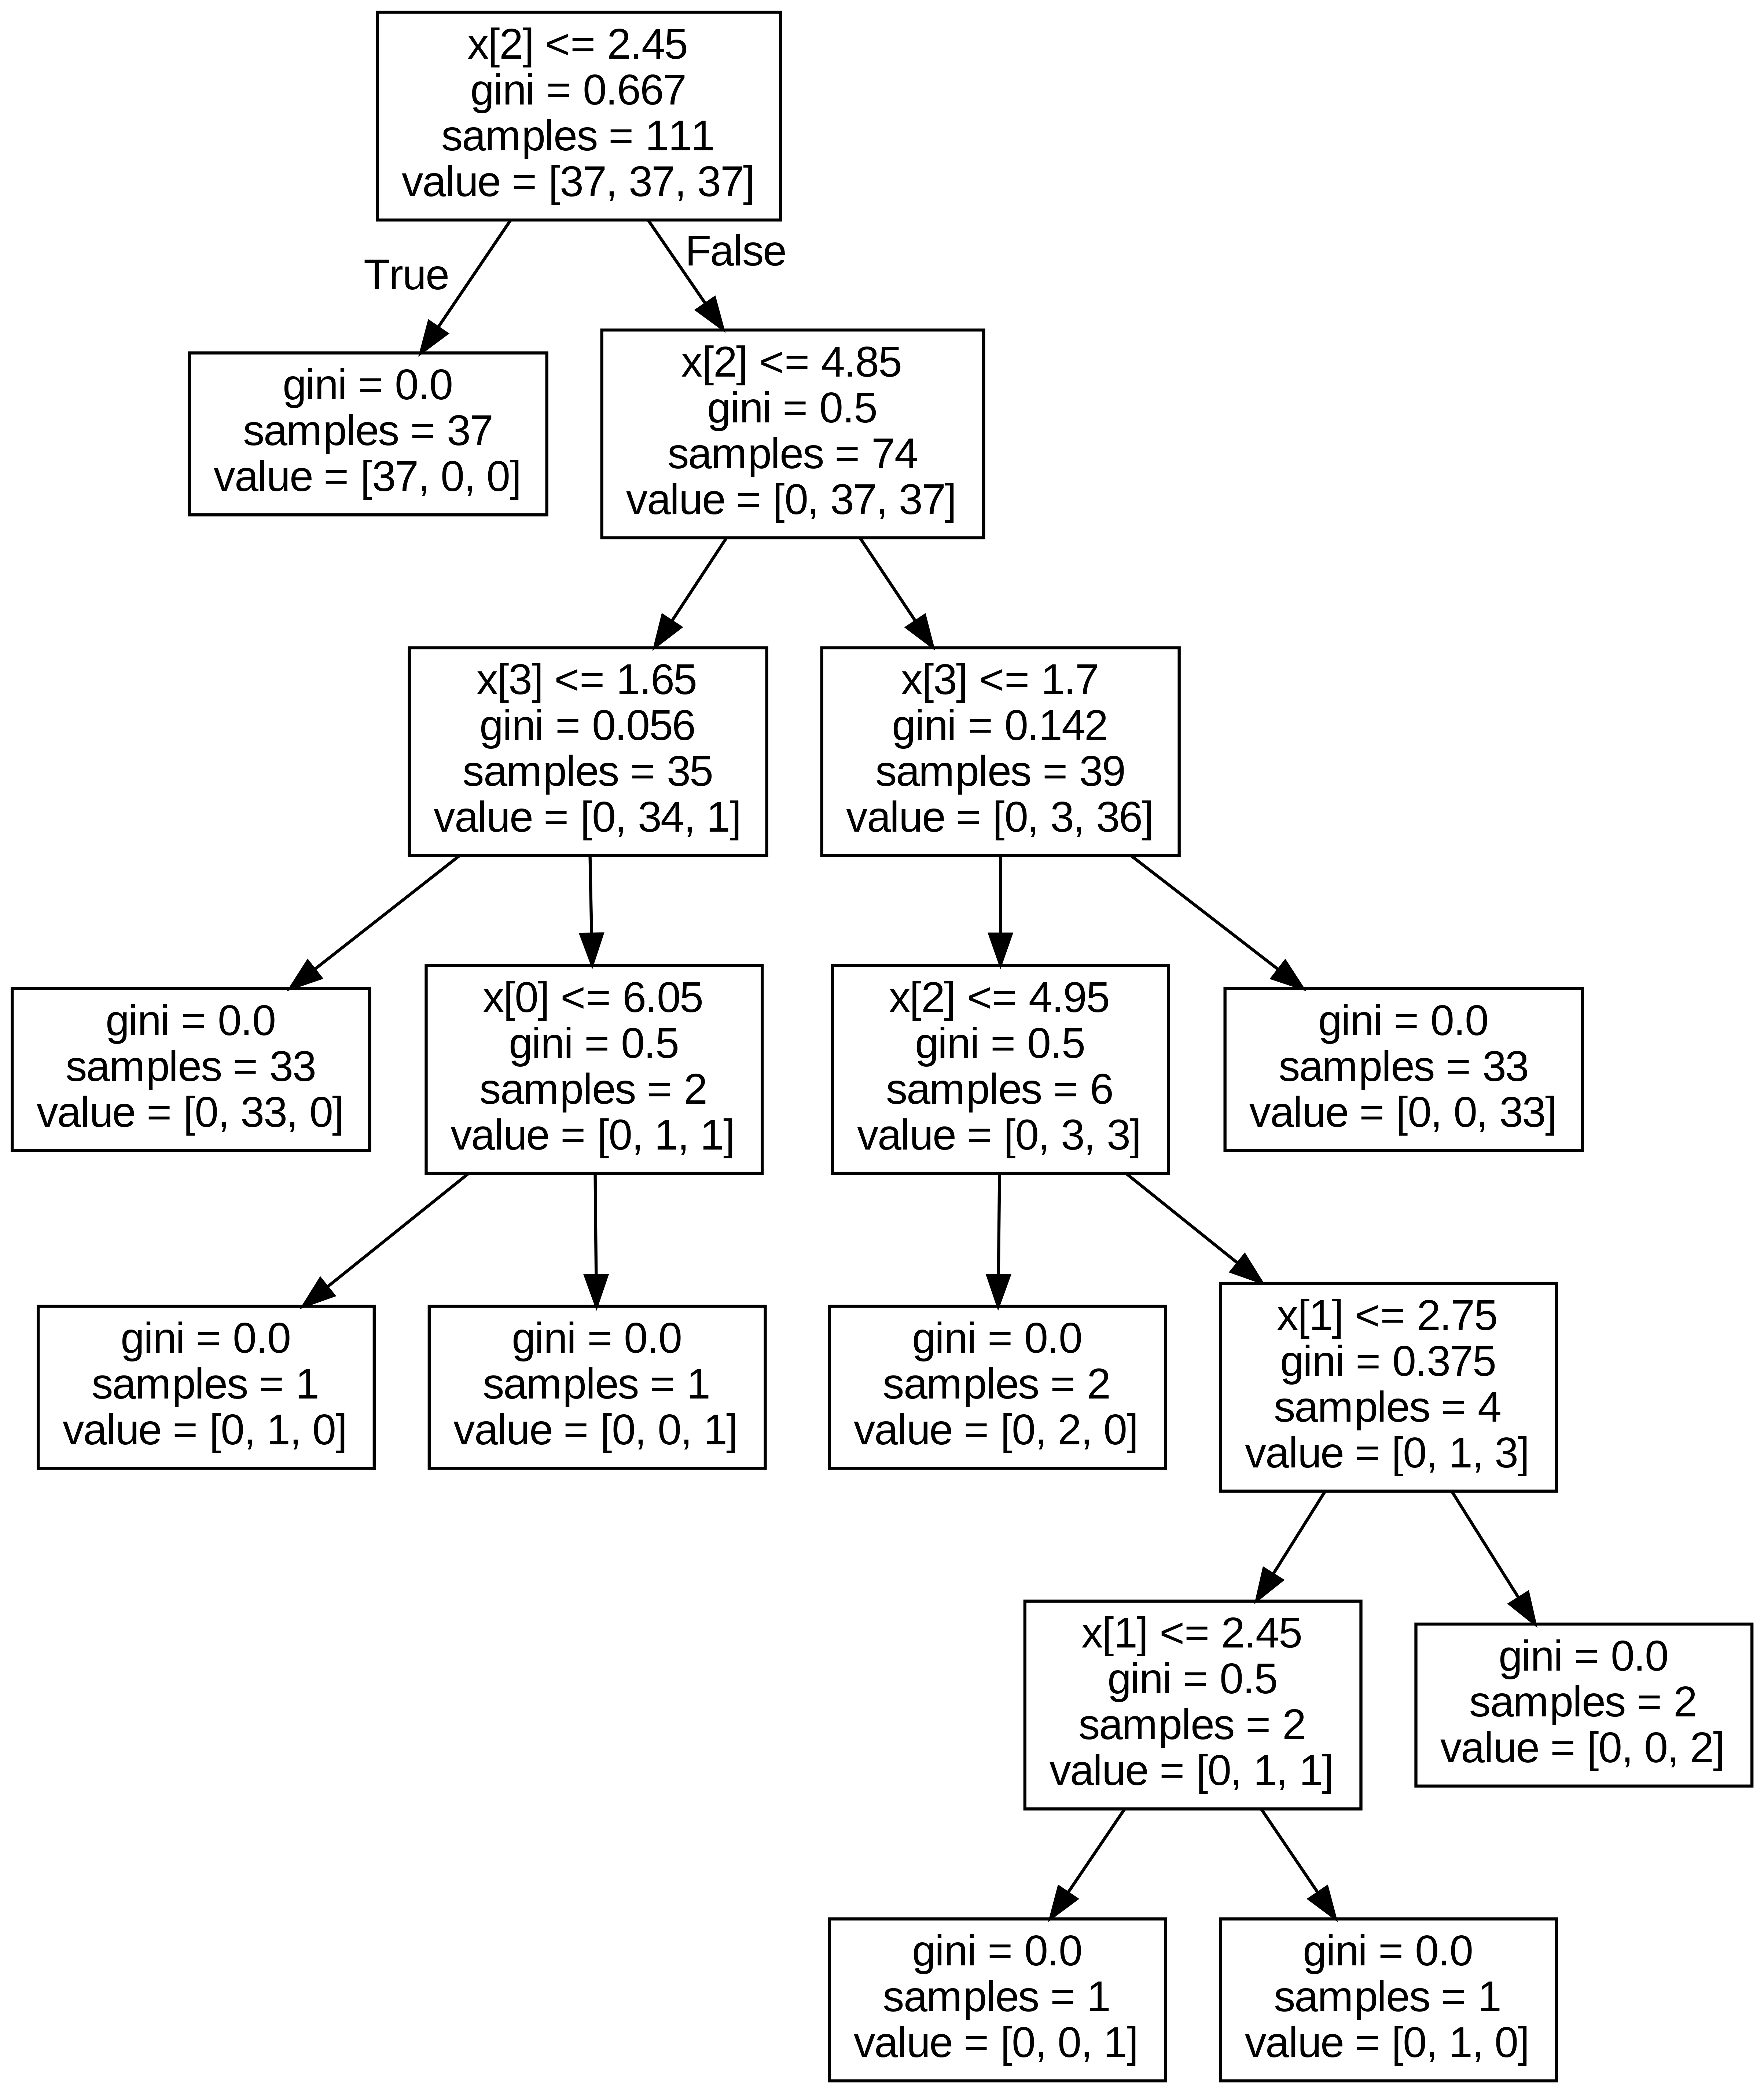

In [5]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# 의사결정나무 모델을 dot 파일로 추출
export_graphviz(model, out_file='tree.dot')

# dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# png 출력
Image(filename = 'tree.png', width = 600, height = 800)

# 문제3
테스트 셋을 사용하여 위에서 생성한 Decision Tree 모델의 정확도를 출력하시오.


In [6]:
# 코드 작성

#테스트용 데이터로 모델 평가
score = model.score(X_test, y_test)
print("테스트셋의 정확도:{:.2f}".format(score))

테스트셋의 정확도:0.89


# 문제4
위에서 생성한 Decision Tree 모델을 활용하여 다음의 값을 포함하고 있는 꽃(new)은 어떤 품종으로 예측되는지 출력하시오.


In [7]:
new = np.array([[5.4, 4, 1.5, 0.2]])

In [9]:
# 코드 작성
y_pred = model.predict(new)
print("예측결과:{}".format(y_pred))

예측결과:[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
